# The Fractional Knapsack Problem

## Theory

### Problem

A set $S=\{1,2,\dots,n\}$ of $n$ items, with each item $i$ having a positive benefit $b_i>0$ and a positive weight $w_i>0$. The goal is to choose fractions of items ($x_i$ each) with a maximum total benefit of weight at most $W$. Formally, we wish to maximize

$$
\sum_ib_ix_i
$$

under the constraint that

$$
\begin{align*}
\sum_iw_ix_i&\le W\\
x_i&\in[0,1]
\end{align*}
$$

This is a variant of the Knapsack Problem, which tightens the second constraint to $x_i\in\{0,1\}$.

### Algorithm

Initially, no item is chosen.

In each step, identify the **best** item available and add as much as possible to the knapsack.

But what is the “best” item? We need to make a **greedy choice**, which can interpret the best item as the one with the highest benefit, the smallest weight, or the greatest benefit over weight ratio, etc.

### Optimal Solution

The greedy strategy of picking items with the highest benefit-to-weight ratio computes an optimal solution.

We use an *exchange argument* to show that any suboptimal solution can become optimal by making a series of exchanges. Each exchange replaces one part of the suboptimal solution with another that improves the overall objective function value.

- ************************Proof************************
    
    We assume for simplicity that all ratios are different. Formally, $\forall i\;j,{b_i\over w_i}\neq{b_j\over w_j}$.
    
    Consider some feasible optimal solution $x$, different from the greedy one.
    
    Let the total benefit of such $x$ be $B=\sum_kb_kx_k$.
    
    There must be items $i$ and $j$ such that $x_i<1$, $x_j>0$ and
    
    $$
    \begin{equation}
    {b_i\over w_i}>{b_j\over w_j}.
    \end{equation}
    $$
    
    If we replace $\delta_j$ of $j$ with $\delta_i$ of $i$ and get a new solution $x'$, then the total benefit of $x'$ is
    
    $$
    B'=B+b_i\delta_i-b_j\delta_j.
    $$
    
    The total weight is changed by $w_i\delta_i-w_j\delta_j$. For the solution $x'$ to be feasible, we don’t change the weight taken:
    
    $$
    w_i\delta_i-w_j\delta_j=0\implies\delta_i={w_j\over w_i}\delta_j.
    $$
    
    Then,
    
    $$
    \begin{align*}
    B'&=B+b_i\left({w_j\over w_i}\delta_j\right)-b_j\delta_j\\
    &=B+\left(b_i{w_j\over w_i}-b_j\right)\delta_j\\
    &=B+\left({b_i\over w_i}-{b_j\over w_j}\right)w_j\delta_j\\
    &>B&\text{by (1)}
    \end{align*}
    $$
    
    Hence, we found a better solution $x'$ which contradicts $x$ being optimal. Therefore the feasible optimal solution $x$ must be the result of the greedy algorithm.
    

### Complexity

The algorithm requires $\mathcal O(n\log n)$ time to sort the items according to $b_i\!/w_i$, and then $\mathcal O(n)$ time to process them in a loop.

## Implementation

We import `numpy` for fast random number generators and linear algebra routines.

In [1]:
import numpy as np

### Problem

We first write a function that can produce a random problem $(b, w, W)$ of size $n = \lvert b\rvert = \lvert w\rvert$.

In [2]:
def problem(n):
    b = np.random.rand(n)
    w = np.random.rand(n)
    W = np.random.rand() * w.sum()
    
    return b, w, W

problem(10)

(array([0.67530033, 0.64431228, 0.99931666, 0.44425137, 0.91922883,
        0.21704675, 0.73458859, 0.7375881 , 0.66674577, 0.36566844]),
 array([0.89009102, 0.90913797, 0.95324127, 0.4942858 , 0.02610788,
        0.89070875, 0.42130594, 0.87404895, 0.68584734, 0.92474794]),
 5.771066473759426)

### Using Python Builtins

In [3]:
def greedy1(b, w, W):
    x = [0] * len(b)
    weight_sum = 0
    for i in sorted(range(len(b)), key=lambda i: b[i] / w[i]):
        x[i] = min(1.0, (W - weight_sum) / w[i])
        weight_sum += x[i] * w[i]
    
    return x

greedy1(*problem(10))

[0.44948476841551677, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]

### Using `numpy`

In [4]:
def greedy2(b, w, W):
    i = np.argsort(b / w)
    x = np.empty_like(i, dtype=float)
    x.put(i, np.clip((W - np.r_[0, np.cumsum(w[i])[:-1]]) / w[i], 0, 1))
    
    return x

greedy2(*problem(10))

array([0.95248089, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

### Time Analysis

In [5]:
from time import perf_counter

def running_time(algorithm, n):
    p = problem(n)
    t0 = perf_counter()
    algorithm(*p)
    t1 = perf_counter()
    
    return t1 - t0

n = np.linspace(1, 1_000_000, 50, dtype=int)
t1 = np.vectorize(lambda size: running_time(greedy1, size))(n)
t2 = np.vectorize(lambda size: running_time(greedy2, size))(n)

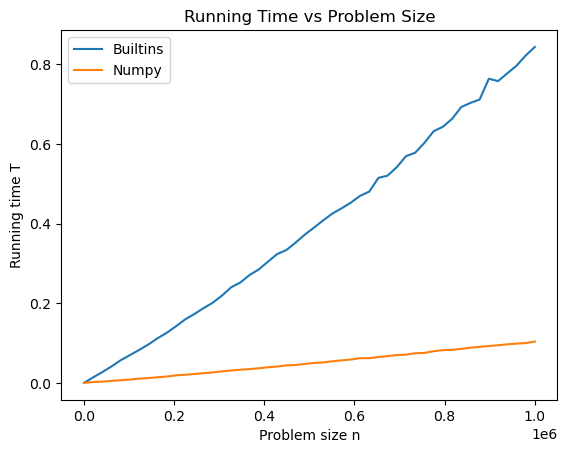

In [6]:
import matplotlib.pyplot as plt

plt.plot(n, t1, label="Builtins")
plt.plot(n, t2, label="Numpy")
plt.title("Running Time vs Problem Size")
plt.xlabel("Problem size n")
plt.ylabel("Running time T")
plt.legend()
plt.show()